In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import nltk

In [ ]:
sms = pd.read_csv(r'/content/drive/MyDrive/spam.csv')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
sms=sms.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
sms=sms.rename(columns={"v1":"label","v2":"text"})
sms.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
print("no of rows", len(sms))

no of rows 5572


In [ ]:
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
sms.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
sms['length']=sms['text'].apply(len)
sms.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: ylabel='Frequency'>

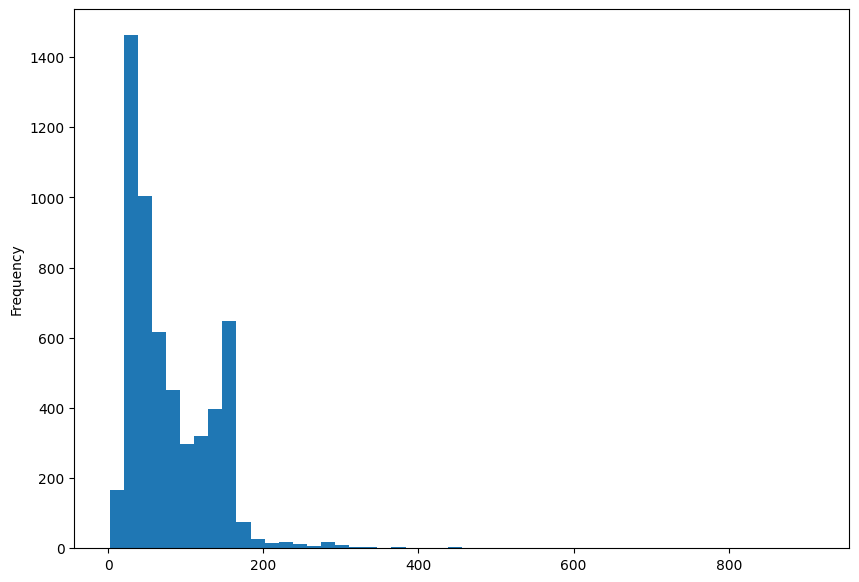

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sms['length'].plot(bins=50, kind='hist', figsize=(10,7))

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

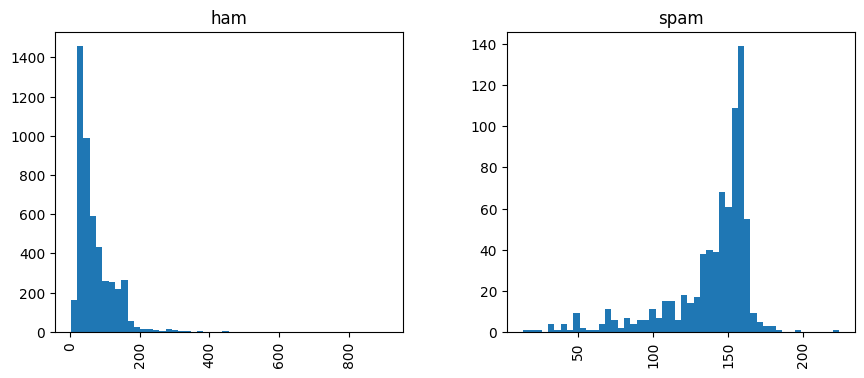

In [ ]:
sms.hist(column='length', by='label', bins=50, figsize=(10,4))

In [ ]:
sms.loc[:,'label']=sms.label.map({'ham':0, 'spam':1})
sms.head()

<ipython-input-10-2d476ed5f859>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sms.loc[:,'label']=sms.label.map({'ham':0, 'spam':1})


,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

count=CountVectorizer()
input=['UR awarded a City Break and could WIN a å£200 Summer Shopping spree every WK. Txt STORE to 88039 . SkilGme.']
text=count.fit_transform(sms['text'],input)

x_train, x_test, y_train, y_test= train_test_split(text,sms['label'], test_size=0.20, random_state=1)
text


<5572x8673 sparse matrix of type '<class 'numpy.int64'>'
	with 73917 stored elements in Compressed Sparse Row format>

In [ ]:
print(x_train.shape)
print(x_test.shape)
input=text[5571]

(4457, 8673)
(1115, 8673)


In [ ]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
prediction=model.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy score: {}".format(accuracy_score(y_test, prediction)))
print("precision score: {}".format(precision_score(y_test, prediction)))
print("recall score: {}".format(recall_score(y_test, prediction)))
print("f1 score: {}".format(f1_score(y_test, prediction)))

Accuracy score: 0.9901345291479821
precision score: 0.9776119402985075
recall score: 0.9424460431654677
f1 score: 0.9597069597069599


In [ ]:
input

<1x8673 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [ ]:
data=sms['text']
input='City Break and could WIN a å£200 Summer Shopping spree every WK. Txt STORE to 88039 . SkilGme. TsCs087147403231Winawk!Age16 å£1.50perWKsub'

In [ ]:
data

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [ ]:
data.loc[len(data.index)]='Exactly. Anyways how far. Is jide her to study or just visiting'

In [ ]:
data

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
5572    Exactly. Anyways how far. Is jide her to study...
Name: text, Length: 5573, dtype: object

In [ ]:
text=count.fit_transform(data)

In [ ]:
text

<5573x8673 sparse matrix of type '<class 'numpy.int64'>'
	with 73929 stored elements in Compressed Sparse Row format>

In [ ]:
input=text[5572]

In [ ]:
model.predict(input)

array([0])